# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data=pd.read_csv("/content/Global Economy Indicators.csv")

In [119]:
!pip list | grep scikit-learn


scikit-learn                     1.2.2


In [3]:
data

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [4]:
data.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [5]:
data.drop(' CountryID ',axis=1, inplace=True)

In [20]:
data=data.rename(columns={'AMA exchange rate':'AMA_exchange_rate',
                          "IMF based exchange rate":"IMF_exchange_rate",
                          'Agriculture, hunting, forestry, fishing (ISIC A-B)':'(ISIC A-B)',
                          'Construction (ISIC F)':'(ISIC F)',
                          'Changes in inventories':'Changes_in_inventories',
                           'Exports of goods and services':"Exports",
                           'Final consumption expenditure':'Final_expenditure',
                           'General government final consumption expenditure':"Govt_expenditure",
                          'Gross capital formation':'GCF',
                          'Gross fixed capital formation (including Acquisitions less disposals of valuables)':"GFCF",
                           'Household consumption expenditure (including Non-profit institutions serving households)':"HCE",
                           'Imports of goods and services':"Imports", 'Manufacturing (ISIC D)':" (ISIC D)",
                          'Mining, Manufacturing, Utilities (ISIC C-E)':"(ISIC C-E)",
       'Other Activities (ISIC J-P)':"(ISIC J-P)",
                          'Total Value Added': 'Total_Value_Added',
       'Transport, storage and communication (ISIC I)':" (ISIC I)",
       'Wholesale, retail trade, restaurants and hotels (ISIC G-H)':"(ISIC G-H)",
                          'Gross National Income(GNI) in USD':"GNI",
                          'Gross Domestic Product (GDP)':"GDP"}).copy()

In [21]:
data.head()

,Country,Year,AMA_exchange_rate,IMF_exchange_rate,Population,Currency,Per capita GNI,(ISIC A-B),Changes_in_inventories,(ISIC F),...,HCE,Imports,(ISIC D),(ISIC C-E),(ISIC J-P),Total_Value_Added,(ISIC I),(ISIC G-H),GNI,GDP
0,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,1.626543e+09,46793902.0,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,1.626543e+09,48994113.0,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,1.626543e+09,44535223.0,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,1.626543e+09,46018542.0,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,1.626543e+09,55721659.0,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [22]:
data.columns = data.columns.str.strip()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 10512 non-null  object 
 1   Year                    10512 non-null  int64  
 2   AMA_exchange_rate       10512 non-null  float64
 3   IMF_exchange_rate       10512 non-null  float64
 4   Population              10512 non-null  int64  
 5   Currency                10512 non-null  object 
 6   Per capita GNI          10512 non-null  int64  
 7   (ISIC A-B)              10512 non-null  float64
 8   Changes_in_inventories  10512 non-null  float64
 9   (ISIC F)                10512 non-null  float64
 10  Exports                 10512 non-null  float64
 11  Final_expenditure       10512 non-null  float64
 12  Govt_expenditure        10512 non-null  float64
 13  GCF                     10512 non-null  float64
 14  GFCF                    10512 non-null

# Handling missing values

In [24]:
data.isnull().sum()

Country                    0
Year                       0
AMA_exchange_rate          0
IMF_exchange_rate          0
Population                 0
Currency                   0
Per capita GNI             0
(ISIC A-B)                 0
Changes_in_inventories     0
(ISIC F)                   0
Exports                    0
Final_expenditure          0
Govt_expenditure           0
GCF                        0
GFCF                       0
HCE                        0
Imports                    0
(ISIC D)                  43
(ISIC C-E)                 0
(ISIC J-P)                 0
Total_Value_Added          0
(ISIC I)                  49
(ISIC G-H)                49
GNI                        0
GDP                        0
dtype: int64

>From the above we saw that 11 columns have null values. The count of null value is highest for "Change im inventories column"

In [25]:
data.columns

Index(['Country', 'Year', 'AMA_exchange_rate', 'IMF_exchange_rate',
       'Population', 'Currency', 'Per capita GNI', '(ISIC A-B)',
       'Changes_in_inventories', '(ISIC F)', 'Exports', 'Final_expenditure',
       'Govt_expenditure', 'GCF', 'GFCF', 'HCE', 'Imports', '(ISIC D)',
       '(ISIC C-E)', '(ISIC J-P)', 'Total_Value_Added', '(ISIC I)',
       '(ISIC G-H)', 'GNI', 'GDP'],
      dtype='object')

In [26]:
data['(ISIC A-B)']=data['(ISIC A-B)'].fillna(data['(ISIC A-B)'].mean())
data['Changes_in_inventories']=data['Changes_in_inventories'].fillna(data['Changes_in_inventories'].mean())
data['Exports']=data['Exports'].fillna(data['Exports'].mean())
data['Govt_expenditure']=data['Govt_expenditure'].fillna(data['Govt_expenditure'].mean())
data['GCF']=data['GCF'].fillna(data['GCF'].mean())
data['GFCF']=data['GFCF'].fillna(data['GFCF'].mean())
data['HCE']=data['HCE'].fillna(data['HCE'].mean())
data[ 'Imports']=data[ 'Imports'].fillna(data[  'Imports'].mean())
data['(ISIC D)']=data['(ISIC D)'].fillna(data[ '(ISIC D)'].mean())
data[ '(ISIC I)']=data['(ISIC I)'].fillna(data[  '(ISIC I)'].mean())
data[  '(ISIC G-H)']=data[   '(ISIC G-H)'].fillna(data[    '(ISIC G-H)'].mean())

In [27]:
data.isnull().sum()

Country                   0
Year                      0
AMA_exchange_rate         0
IMF_exchange_rate         0
Population                0
Currency                  0
Per capita GNI            0
(ISIC A-B)                0
Changes_in_inventories    0
(ISIC F)                  0
Exports                   0
Final_expenditure         0
Govt_expenditure          0
GCF                       0
GFCF                      0
HCE                       0
Imports                   0
(ISIC D)                  0
(ISIC C-E)                0
(ISIC J-P)                0
Total_Value_Added         0
(ISIC I)                  0
(ISIC G-H)                0
GNI                       0
GDP                       0
dtype: int64

Handling Categorical **Data**

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Country']=label_encoder.fit_transform(data['Country'])
data['Currency']=label_encoder.fit_transform(data['Currency'])

Droping Duplicate Values

> Using mean method filled all the null part and now we don't have any null values.

In [29]:
data.duplicated().sum()

0

>No duplicate values are there.

# EDA

# Descriptive Analysis

In [48]:
data.describe()

,Country,Year,AMA_exchange_rate,IMF_exchange_rate,Population,Currency,Per capita GNI,(ISIC A-B),Changes_in_inventories,(ISIC F),...,HCE,Imports,(ISIC D),(ISIC C-E),(ISIC J-P),Total_Value_Added,(ISIC I),(ISIC G-H),GNI,GDP
count,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,...,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.051200e+04
mean,107.378139,1996.262747,3.305837e+01,3.419846e+02,2.851523e+07,71.765221,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,62.698262,14.900361,4.979378e+01,1.941857e+03,1.141296e+08,44.747553,17070.205895,4.011060e+10,8.112476e+09,4.985596e+10,...,6.023499e+11,1.800742e+11,1.720380e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.165919e+10,1.388480e+11,9.942144e+11,9.845997e+11
min,0.000000,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,0.000000,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,54.000000,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,36.750000,730.000000,1.336557e+08,3.913107e+06,6.815523e+07,...,9.466590e+08,5.927280e+08,1.124541e+08,1.857038e+08,3.555891e+08,1.355670e+09,9.085524e+07,2.095024e+08,1.410772e+09,1.439217e+09
50%,108.000000,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,60.000000,2316.500000,9.569466e+08,1.890237e+08,3.717701e+08,...,5.258546e+09,2.926233e+09,9.198989e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.516195e+08,1.074474e+09,7.887233e+09,8.070572e+09
75%,160.000000,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,110.000000,8965.750000,4.213059e+09,1.626543e+09,2.815730e+09,...,3.098087e+10,1.658681e+10,7.591012e+09,1.251358e+10,1.442130e+10,4.819144e+10,4.083113e+09,6.905887e+09,5.005789e+10,5.172596e+10
max,219.000000,2021.000000,1.268579e+02,4.200000e+04,1.425893e+09,152.000000,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


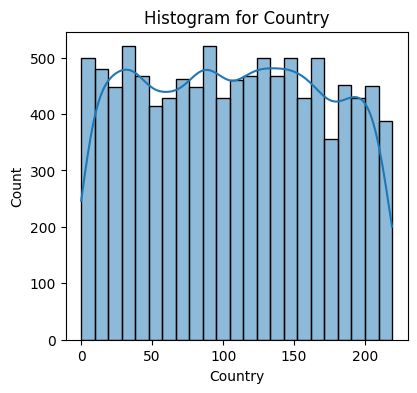

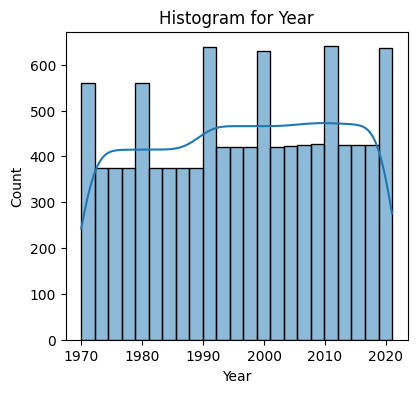

In [49]:
first_three_columns = data.iloc[:, :2]

for column in first_three_columns.columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(first_three_columns[column], kde=True)
    plt.title(f"Histogram for {column}")

plt.show()


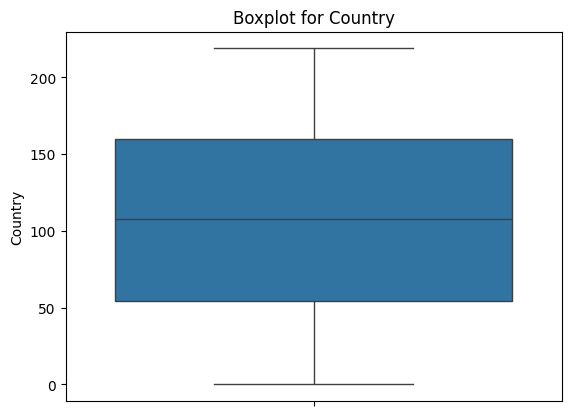

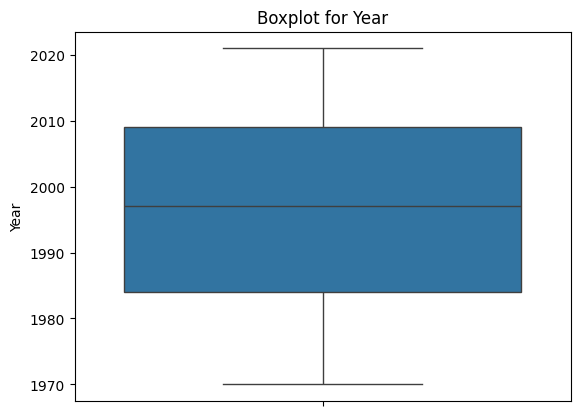

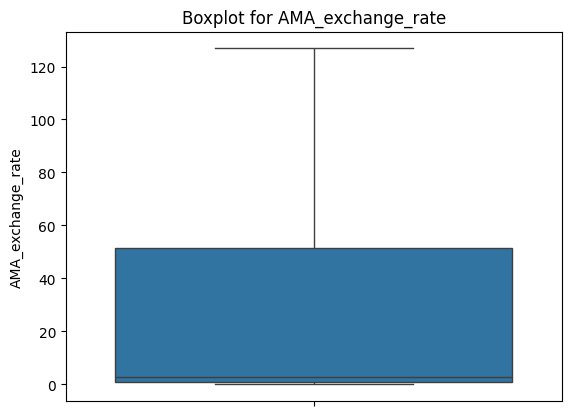

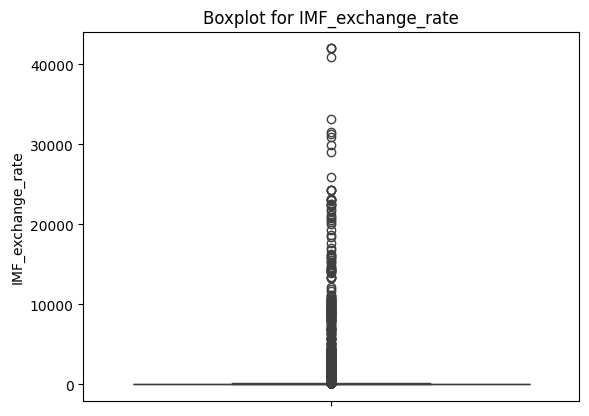

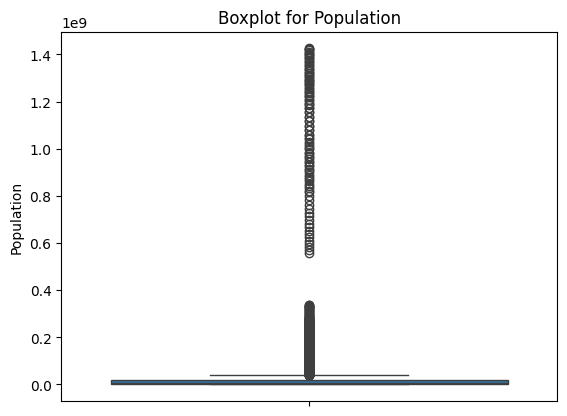

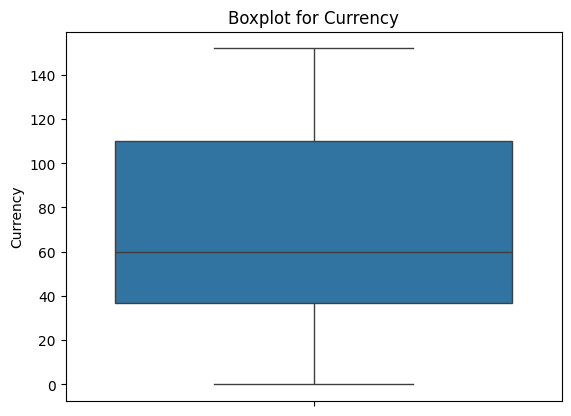

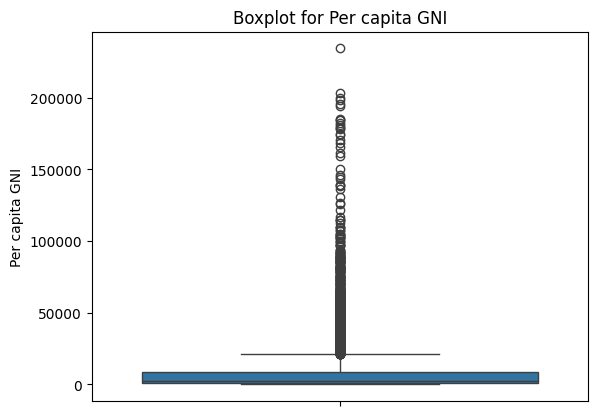

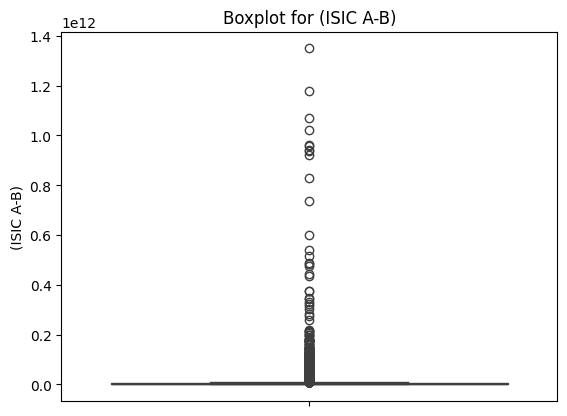

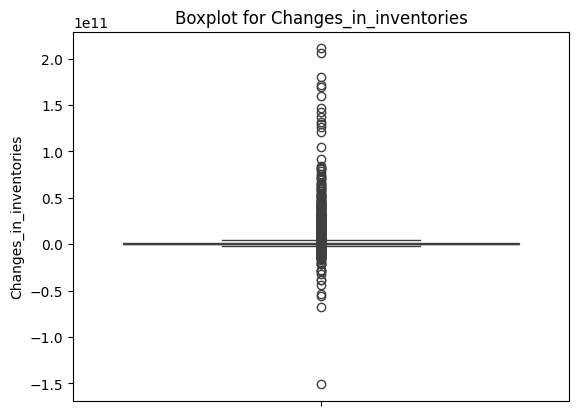

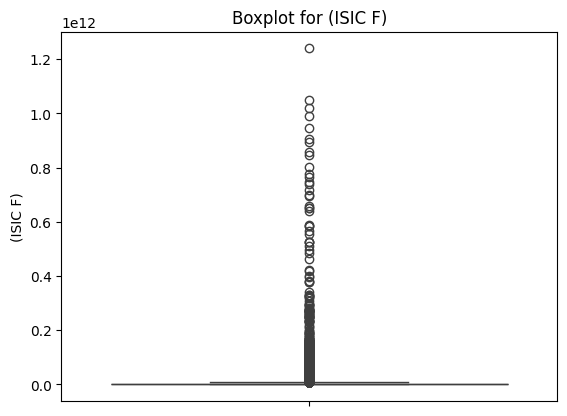

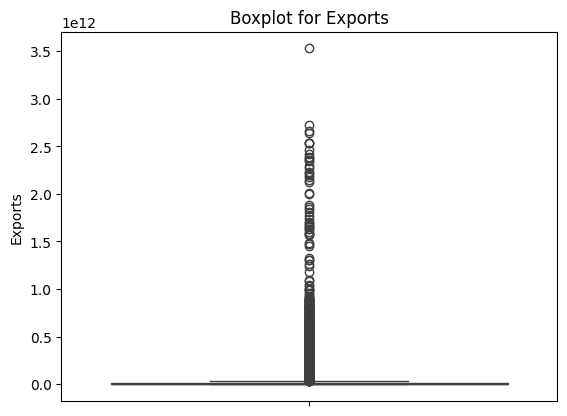

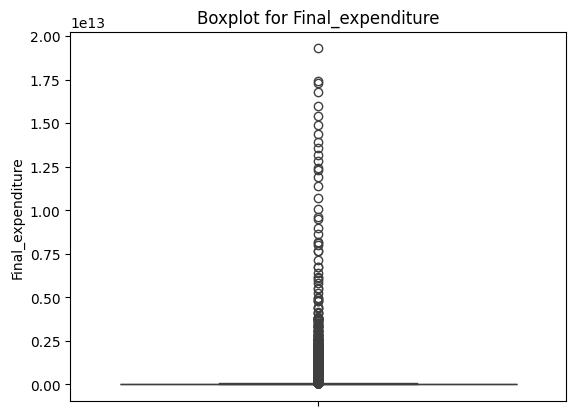

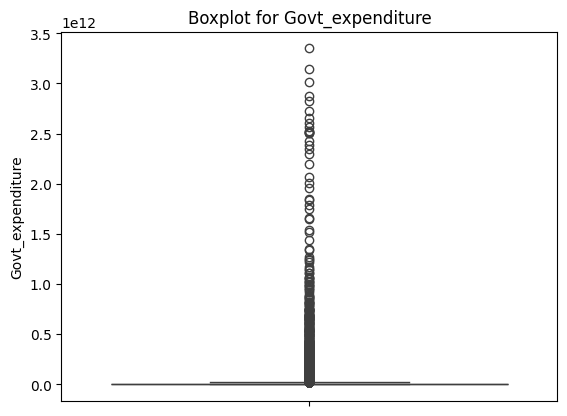

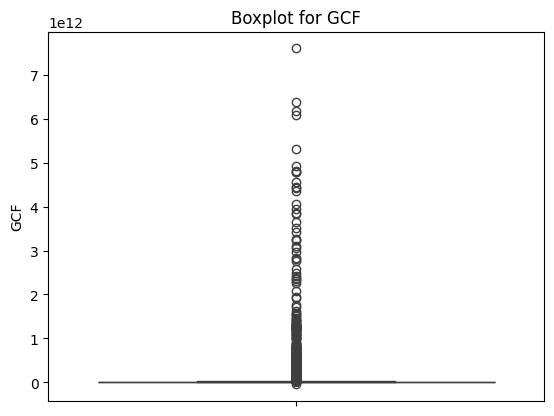

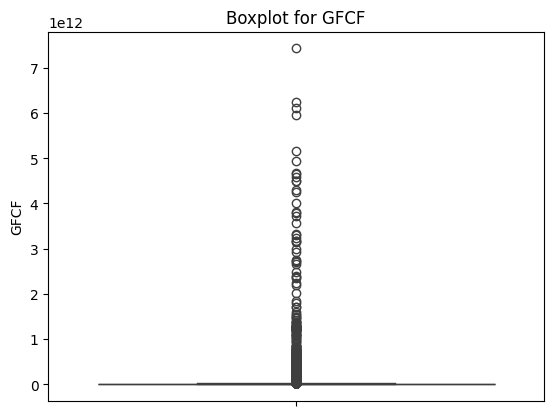

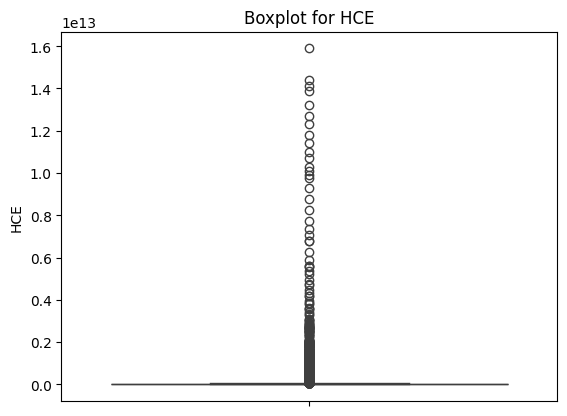

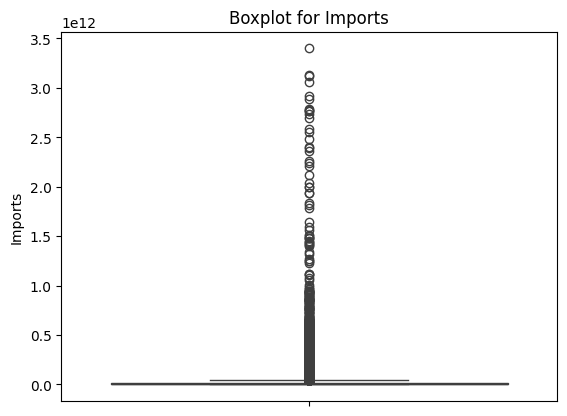

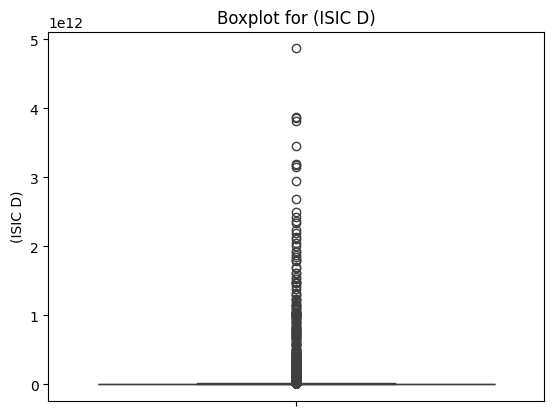

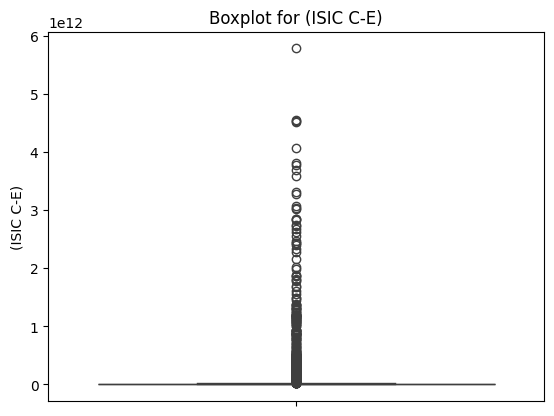

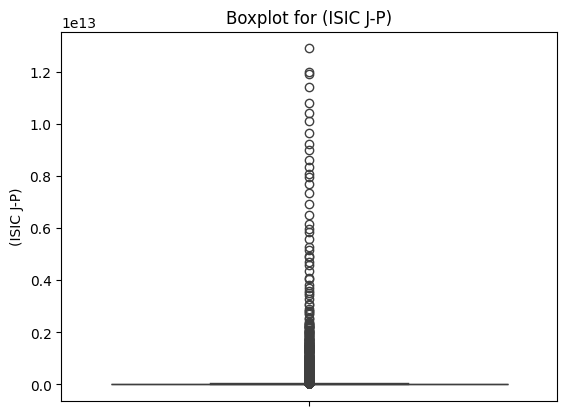

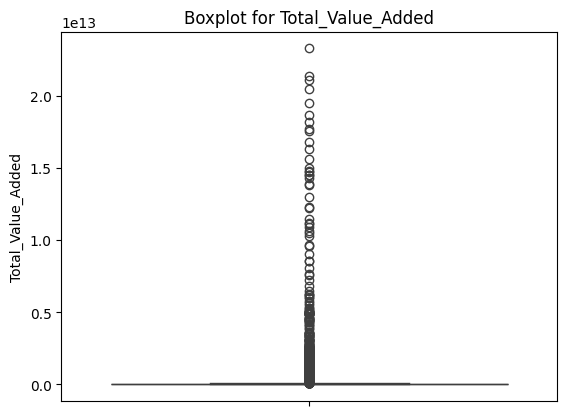

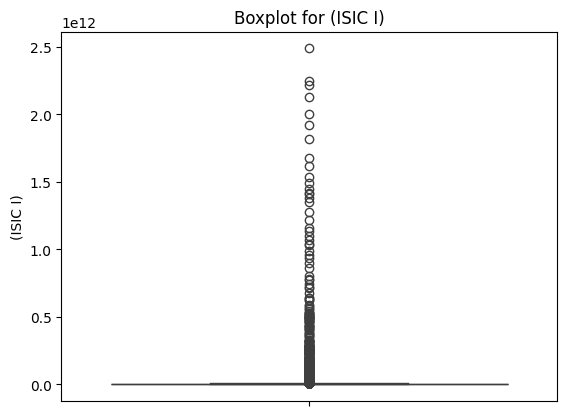

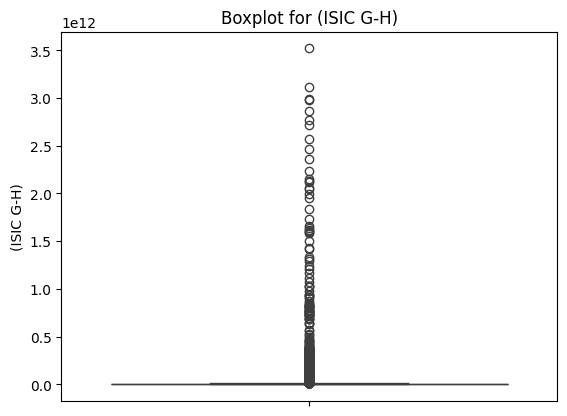

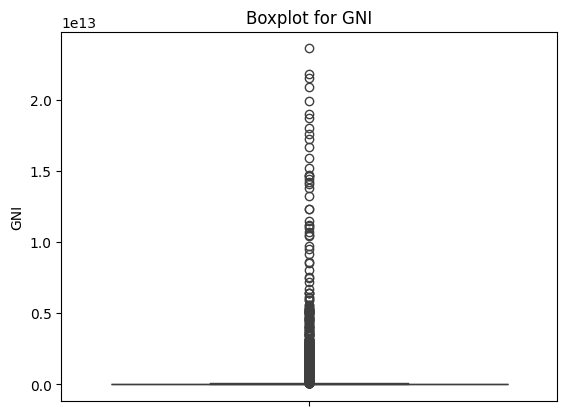

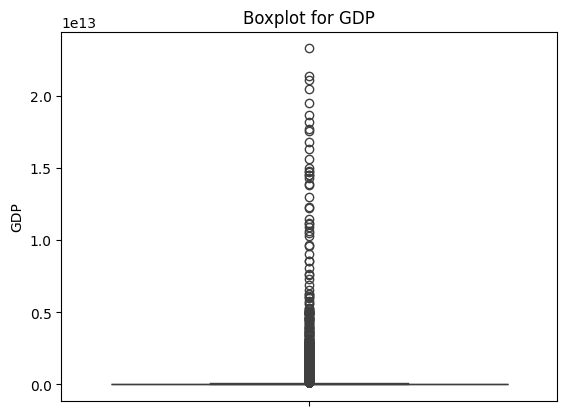

In [50]:
for i in data.columns:
    if data[i].dtype == 'int64' or data[i].dtype == 'float64':
        sns.boxplot(y=data[i], orient='vertical')
        plt.title(f'Boxplot for {i}')
        plt.show()


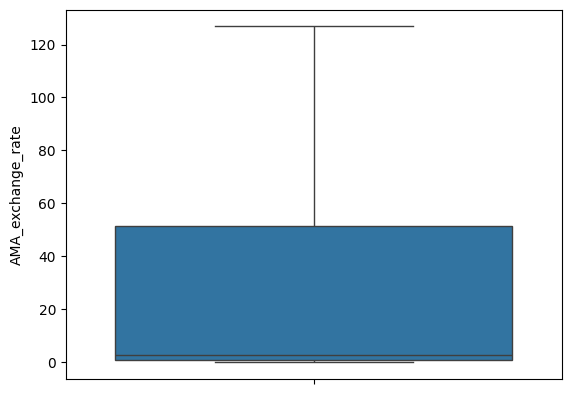

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['AMA_exchange_rate'])
plt.show()

In [52]:
quartile=data['AMA_exchange_rate'].quantile(q=[0.25,0.75])
quartile

0.25     1.000000
0.75    51.343163
Name: AMA_exchange_rate, dtype: float64

In [53]:
import numpy as np
quartile.iloc[1]
q1=quartile.iloc[0]
q3=quartile.iloc[1]
iqr=q3-q1
iqr
maxwisker=q3+1.5*(iqr)
print(maxwisker)
minwisker=q1-1.5*(iqr)
print(minwisker)
data['AMA_exchange_rate']=np.where(data['AMA_exchange_rate']>126.85790676875,126.85790676875,data['AMA_exchange_rate'])

126.85790676875
-74.51474406125


<Axes: ylabel='AMA_exchange_rate'>

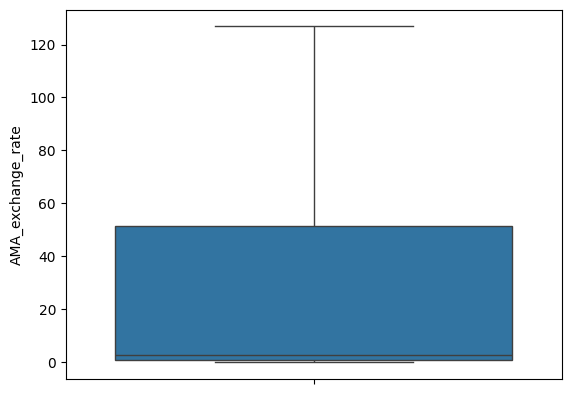

In [54]:
sns.boxplot(data['AMA_exchange_rate'])


Bivariate ***Analysis***

In [55]:
target_column = 'IMF_exchange_rate'
independent_columns = ['Changes_in_inventories','Population','AMA_exchange_rate',"Year",'Exports', 'Imports']

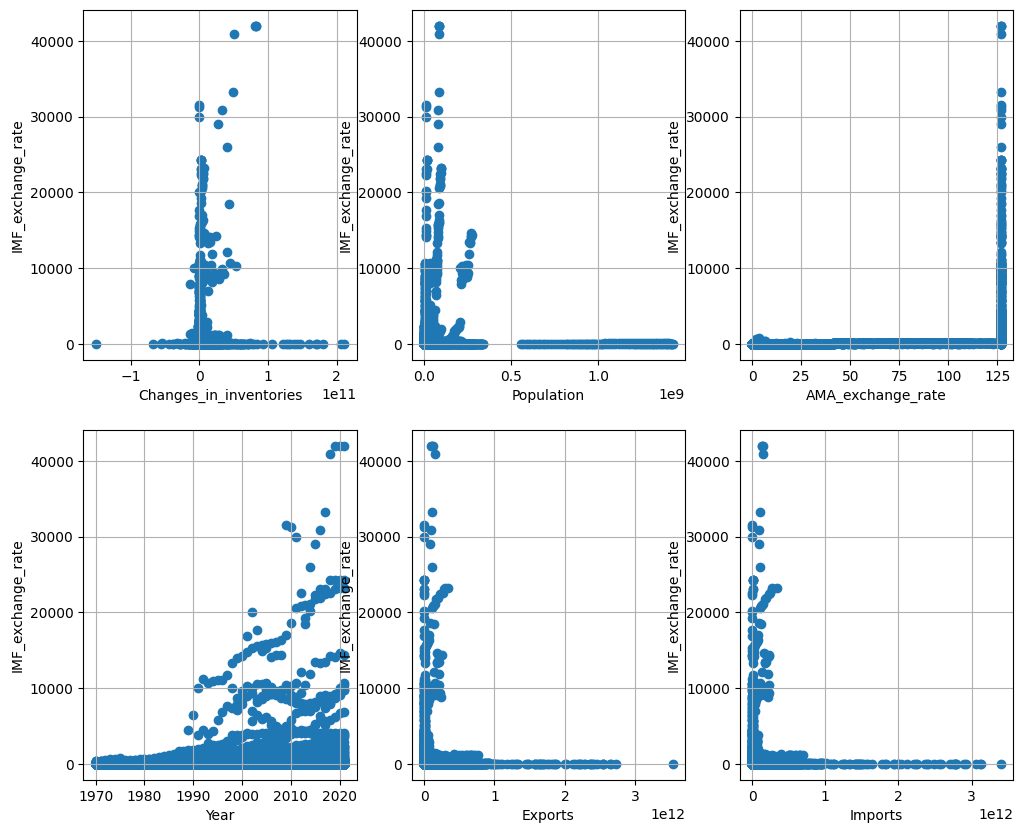

In [56]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(independent_columns, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(data[column], data[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.grid(True)

Text(0.5, 1.0, 'Global GDP since 1970')

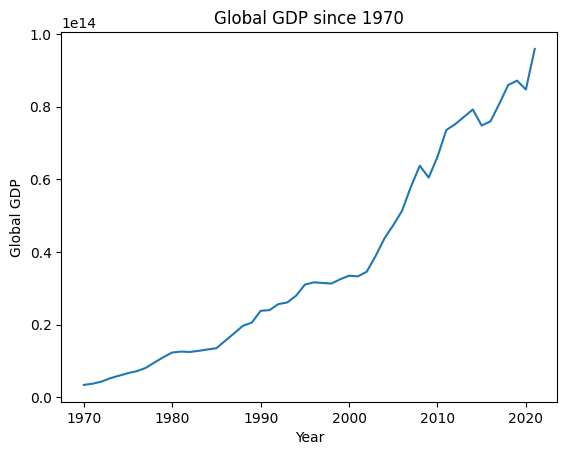

In [57]:
df = data.groupby(['Year']).sum()
df_gdp = df['GDP']
df_gdp.plot();
plt.ylabel('Global GDP')
plt.xlabel('Year')
plt.title('Global GDP since 1970')

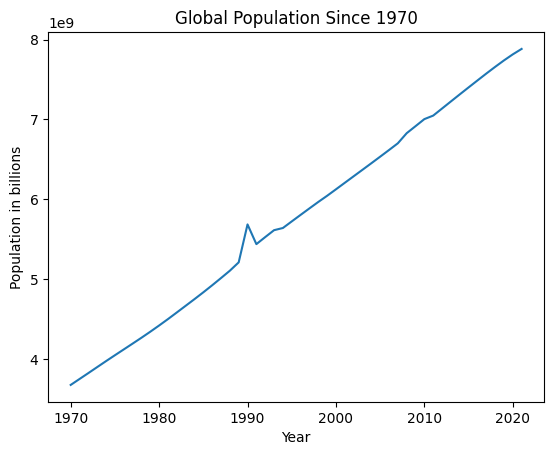

In [58]:
df1 = data[['Country','Year','Population']]
df1.groupby(['Year']).Population.sum().sort_index().plot()
plt.ylabel('Population in billions')
plt.xlabel('Year')
plt.title('Global Population Since 1970');

MULTIVARIATE **ANALYSIS**

In [59]:
df_2021 = data[data['Year'] == 2021]
top_15_countries = df_2021.nlargest(15, 'GDP')

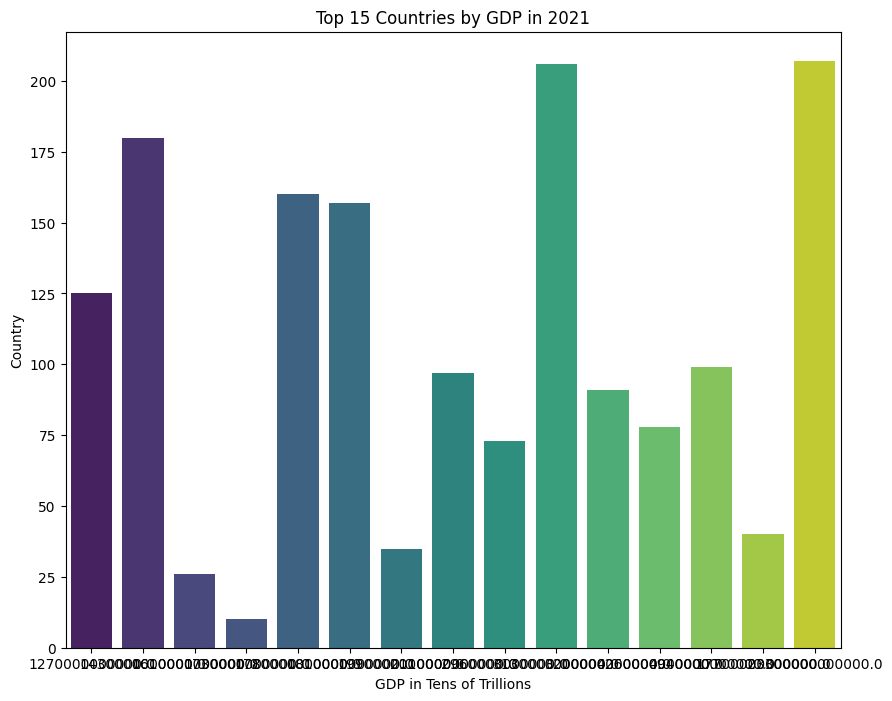

In [60]:
plt.figure(figsize=(10, 8))
sns.barplot(x='GDP', y='Country', data=top_15_countries, palette='viridis')
plt.title('Top 15 Countries by GDP in 2021')
plt.xlabel('GDP in Tens of Trillions')
plt.ylabel('Country')

plt.show()

In [61]:
data.corr()['IMF_exchange_rate'].sort_values(ascending=False)

IMF_exchange_rate         1.000000
AMA_exchange_rate         0.325029
Year                      0.145939
Changes_in_inventories    0.131074
Country                   0.067958
(ISIC A-B)                0.047207
Population                0.036559
Currency                  0.025087
(ISIC C-E)                0.006260
GCF                       0.003999
Imports                   0.003666
Exports                   0.003662
(ISIC F)                  0.002432
GFCF                     -0.000032
(ISIC D)                 -0.000565
Total_Value_Added        -0.003638
GDP                      -0.003951
(ISIC G-H)               -0.004356
(ISIC I)                 -0.004447
GNI                      -0.004487
HCE                      -0.005180
Final_expenditure        -0.006682
(ISIC J-P)               -0.012210
Govt_expenditure         -0.012832
Per capita GNI           -0.067830
Name: IMF_exchange_rate, dtype: float64

**Clustering**

In [62]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

Z1 = linkage(df, method='average', metric='cityblock')
clusters = fcluster(Z1, t=2, criterion='maxclust')
silhouette_avg = silhouette_score(df, clusters)
print(f'Silhouette Score for average linkage and cityblock distance metric: {silhouette_avg}')

Silhouette Score for average linkage and cityblock distance metric: 0.7003834587866409


In [63]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(Z1)
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=True, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

K MEANS CLUSTERING

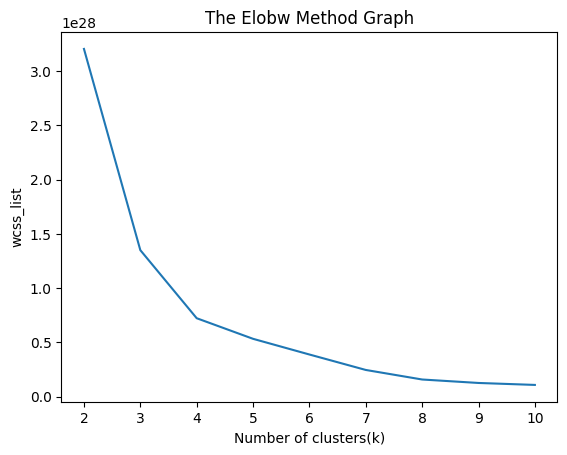

In [64]:
from sklearn.cluster import KMeans
wcss_list= []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

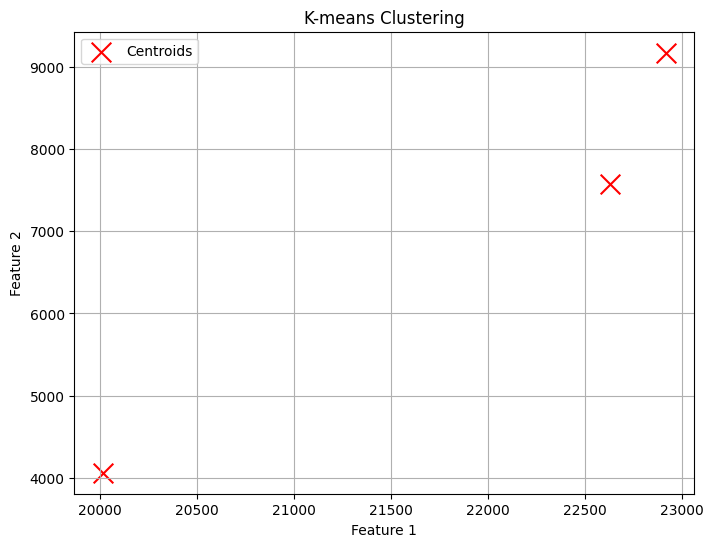

In [65]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Feature Selection

In [86]:
features=['AMA_exchange_rate','Year','Changes_in_inventories','Country','(ISIC A-B)','Population']
X=data[features]


In [87]:
X=df.drop(["IMF_exchange_rate"],axis=1)
y=df["IMF_exchange_rate"]

In [88]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


LINEAR REGRESSION

In [89]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
import xgboost as xgb

In [91]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model1.predict(X_test)

In [93]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 14001496.424700331
R-squared Score: 0.9973448915663274


>Ridge Regression

In [94]:
model2=Ridge(alpha=1.0)
model2.fit(X_train,y_train)

Ridge()

In [95]:
y_pred=model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 14003389.428971231
R-squared Score: 0.9973445325952967


>SVR

In [96]:
model3=SVR()
model3.fit(X_train,y_train)

SVR()

In [97]:
y_pred=model3.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 5873971215.544566
R-squared Score: -0.11388311938063644


>Random Forest Regressor

In [98]:
model4=RandomForestRegressor(n_estimators=100, random_state=42)
model4.fit(X_train,y_train)



RandomForestRegressor(random_state=42)

In [99]:
y_pred=model4.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 87689985.01185602
R-squared Score: 0.9833713189153938


>Lasso Regression


In [100]:
model5=Lasso(alpha=1.0)
model5.fit(X_train,y_train)

Lasso()

In [101]:
y_pred=model5.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 31811166.203526877
R-squared Score: 0.9939676379502593


# Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [102]:
grid_search = GridSearchCV(estimator=model4, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [103]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [104]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:", r2_score)

Mean Squared Error: 79359766.2193125
R2_score: 0.9849509810814606


>Comparison of MSE value

In [105]:
mse_values = {'linear_regression': 1912.4072205848418, 'RIdge': 1912.4002330743629, 'SVR':  2842.6338000438527,'Random_forest':37.57894940284747,'Lasso':1908.9877913683163,"Grid_search":36.75979845707393}


models = list(mse_values.keys())
mse_scores = list(mse_values.values())

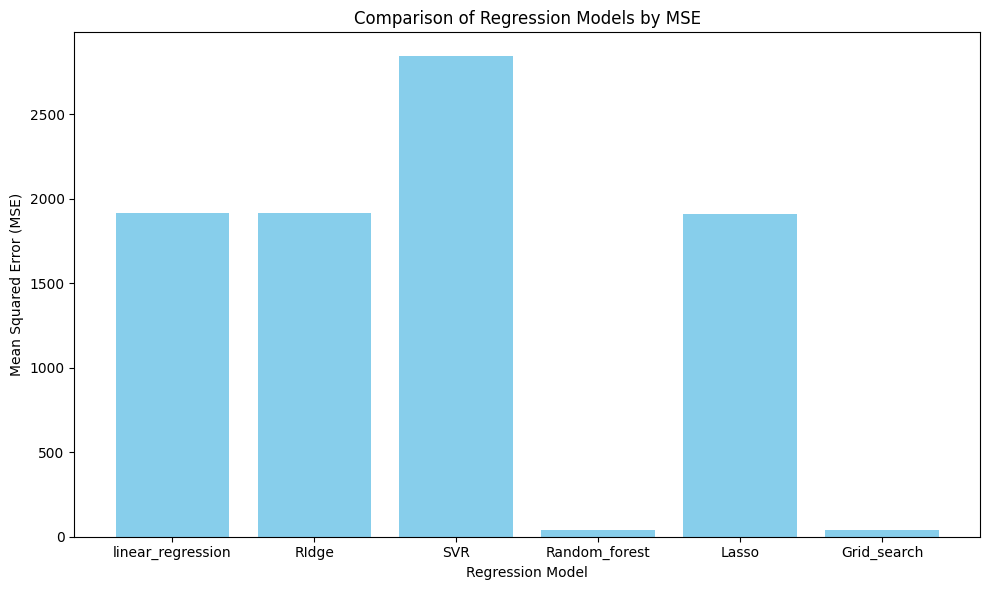

In [106]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color='skyblue')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models by MSE')
plt.tight_layout()
plt.show()

# Prediction

In [107]:
# Assuming 'df' is your DataFrame with all features
X = df.drop("IMF_exchange_rate", axis=1)
y = df["IMF_exchange_rate"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of your training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (41, 23)
Shape of X_test: (11, 23)


In [111]:
X_test

,Country,AMA_exchange_rate,Population,Currency,Per capita GNI,(ISIC A-B),Changes_in_inventories,(ISIC F),Exports,Final_expenditure,...,HCE,Imports,(ISIC D),(ISIC C-E),(ISIC J-P),Total_Value_Added,(ISIC I),(ISIC G-H),GNI,GDP
Year,,,,,,,,,,,,,,,,,,,,,
1989,20216,5514.073826,5210437109,13441,1104486,1.088781e+12,2.800362e+11,1.246949e+12,3.588392e+12,1.531486e+13,...,1.203235e+13,3.715054e+12,4.259186e+12,5.310003e+12,7.785403e+12,1.991048e+13,1.612945e+12,2.912055e+12,2.047512e+13,2.056686e+13
2011,22936,8630.538486,7048307365,15421,3474306,3.009408e+12,9.377704e+11,3.824270e+12,2.226679e+13,5.425630e+13,...,4.166305e+13,2.162968e+13,1.165184e+13,1.693056e+13,3.012648e+13,6.977918e+13,6.129049e+12,9.815117e+12,7.350217e+13,7.356080e+13
2017,22864,9585.099435,7574128959,15329,3458502,3.371173e+12,6.777971e+11,4.420723e+12,2.272195e+13,5.924968e+13,...,4.592645e+13,2.218463e+13,1.290147e+13,1.709160e+13,3.419074e+13,7.704048e+13,7.011004e+12,1.100976e+13,8.089957e+13,8.081004e+13
1982,20003,3965.552117,4582874501,13292,775359,8.439535e+11,7.020392e+10,7.584501e+11,2.148157e+12,9.357356e+12,...,7.300514e+12,2.250767e+12,2.700234e+12,3.606389e+12,4.281469e+12,1.214649e+13,9.714384e+11,1.747647e+12,1.245564e+13,1.248192e+13
2013,22864,8912.657869,7225344454,15329,3535189,3.313254e+12,7.187192e+11,4.090583e+12,2.320736e+13,5.683657e+13,...,4.381549e+13,2.246299e+13,1.213663e+13,1.745899e+13,3.178020e+13,7.337863e+13,6.456089e+12,1.037121e+13,7.714503e+13,7.717998e+13
1975,20003,3519.568439,4047354583,13292,441817,5.486364e+11,9.289720e+10,4.412845e+11,1.057048e+12,4.925301e+12,...,3.891018e+12,1.102741e+12,1.612764e+12,1.964053e+12,2.091497e+12,6.433713e+12,5.094864e+11,9.324513e+11,6.667737e+12,6.660571e+12
1987,20003,5072.624802,5013839151,13292,982170,9.467223e+11,1.456301e+11,1.036224e+12,2.911569e+12,1.328762e+13,...,1.039557e+13,2.996354e+12,3.710968e+12,4.644911e+12,6.568007e+12,1.704894e+13,1.402641e+12,2.506184e+12,1.754999e+13,1.760674e+13
2020,22864,9953.813932,7815043098,15329,3395155,3.712690e+12,4.004675e+11,4.693988e+12,2.210411e+13,6.195361e+13,...,4.696316e+13,2.158611e+13,1.326819e+13,1.733285e+13,3.710107e+13,8.112257e+13,7.392635e+12,1.088277e+13,8.472183e+13,8.469543e+13
1973,20003,3512.979940,3899150761,13292,313673,4.815577e+11,1.341054e+11,3.462233e+11,7.375862e+11,3.783794e+12,...,3.059050e+12,7.723657e+11,1.357701e+12,1.560658e+12,1.604144e+12,5.083962e+12,4.079015e+11,7.332988e+11,5.263556e+12,5.265354e+12


In [112]:

import numpy as np

# Correct the input array by removing the extra comma
X_input = np.array([[1989,3105,2369.197760,2051171339,2470,411985.0,3.379322e+11,
                     1.074698e+11,3.195424e+11,1.238459e+12,4.041569e+12,3.050876e+12,
                     1.300624e+12,1.034836e+12,1.406279e+12,1.979671e+12,5.071238e+12,
                     3.636363e+11,6.630357e+11,5.352356e+12,5.411732e+12,45,46]])

# Check if model4 is defined
try:
    prediction = model4.predict(X_input)
    print(prediction)
except NameError:
    print("The model 'model4' is not defined. Please ensure the model is loaded correctly.")
except ValueError as ve:
    print(f"ValueError: {ve}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



[29288.71288087]


In [113]:
y

Year
1970      6648.575252
1971      6669.402297
1972      6679.335293
1973      6316.170121
1974      6382.963568
1975      6204.712069
1976      6341.504601
1977      6197.807236
1978      5994.207986
1979      6024.259706
1980      5791.422063
1981      6870.092825
1982      7960.347667
1983      9158.431464
1984     10397.699840
1985     11090.217505
1986     10219.820860
1987     10767.097764
1988     12057.846529
1989     18026.133240
1990     22330.186696
1991     29891.795077
1992     34355.521732
1993     37733.440802
1994     43434.243383
1995     45215.996274
1996     47927.889725
1997     53181.533318
1998     67288.834183
1999     73699.389997
2000     80058.833343
2001     93614.584365
2002    104976.125856
2003    106373.723962
2004    103575.579209
2005    106916.779174
2006    106465.109969
2007    103221.400926
2008    102400.447043
2009    125188.945784
2010    127111.279298
2011    128351.768466
2012    126032.721914
2013    130860.173596
2014    142964.004711
2015 

In [117]:
!pip list | grep scikit-learn


scikit-learn                     1.2.2


# Web integration part

In [114]:
import pickle

In [115]:
pickle.dump(model4,open("GEI_file.pkl","wb"))

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
